# Assignment 3 - Supervised Learning

## *Abhishek Baral*
Netid: aa542

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
1. Understand the primary workflow in machine learning: (1) identifying a hypothesis function set of models, (2) determining a loss/cost/error/objective function to minimize, and (3) minimizing that function through gradient descent
2. Implement batch gradient descent and become familiar with how that technique is used and its dependence on the choice of learning rate
3. Gain practice in implementing machine learning algorithms to understand the math and programming behind them to achieve practical proficiency with the techniques
4. Evaluate supervised learning algorithm performance through ROC curves and using cross validation
5. Work with imagery data and the basics of computer vision approaches to machine learning
6. Develop an understanding the optimal minimum misclassification error classifier (Bayes' classifier)

In [1]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \dfrac{e^x}{1+e^{x}}= \dfrac{1}{1+e^{-x}}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^{\intercal} \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $\mathbf{x}_i=[x_{i,0}, x_{i,1}, x_{i,2}]^{\intercal}$, and $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model parameters. For one sample, $(y_i, \mathbf{x}_i)$, this is given as:

$$P(Y=y_i|X=\mathbf{x}_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^{\intercal} \mathbf{x}_i)$$

*Aside: the careful reader will recognize this expression looks different from when we talk about the likelihood of our data given the true class label, typically expressed as $P(x|y)$, or the posterior probability of a class label given our data, typically expressed as $P(y|x)$. In the context of training a logistic regression model, we know the training $\mathbf{x}$ values and $y$ values, so the above probability is primarily a function of the logistic regression parameters, $\mathbf{w}$. It's our goal to use this to choose the parameters to maximize the probability of our data by adjusting our model*

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function for all the $N$ samples in our training dataset that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]^{\intercal}$, and output the class confidence probabilities, $P(Y=y_i|X=\mathbf{x}_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm.  In doing this we'll need to make some assumptions about and/or experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

Please compute your cost function for a batch as the average cost for the data in your current batch (in this case, a batch is your entire training dataset). In other words, divide your cost by the number of samples in each batch.

**(j)** Design your approach so that at each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data (no output is necessary here, but this is used in the following question).

**(k)** Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the training set the remaining 70 percent. Show the gradient descent process for different learning rates by plotting the resulting cost as a function of each iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question. 

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatter-plot and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

### a

$p(y|x) = \prod_{i =1}^{N} \sigma(w^txi)^yi [1-\sigma(w^txi)]^{1-yi}$

### b

$-\sum_{i=1}^{N}y_{i}*ln(w^{T}x_{i}) + (1 - y_{i})ln(1 - \sigma(w^{T}x_{i}))$

### c

$${\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\dfrac{\partial C}{\partial w_0}, \dfrac{\partial C}{\partial w_1}, \dfrac{\partial C}{\partial w_2}\right] = \left[-\sum_{i = 1}^{N}(\hat{y} - y_i), -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,1}, -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,2} \right]}$$

where $\hat{y}_i \triangleq \sigma(\mathbf{w}^{T}\mathbf{x}_i) = \frac{1}{1+e^{-\mathbf{w}^{T}\mathbf{x}_i}}$ is for logistic regression

### d


$${\left[w_{j+1,0}, w_{j+1,1}, w_{j+1,2}\right] = \left[w_{j,0}, w_{j,1}, w_{j,2}\right] - \eta \left[-\sum_{i = 1}^{N}(\hat{y} - y_i), -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,1}, -\sum_{i = 1}^{N}(\hat{y} - y_i)x_{i,2} \right]} $$
where $\hat{y}_i \triangleq \sigma(\mathbf{w}^{T}\mathbf{x}_i) = \frac{1}{1+e^{-\mathbf{w}^{T}\mathbf{x}_i}}$ is for logistic regression

### e

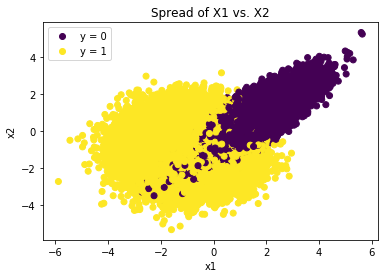

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split


df = pd.read_csv('C:\\Users\\abhis\\Documents\\Duke University\\IDS 705 Machine Learning\\A3_Q1_data.csv')

scatter = plt.scatter(x = 'x1', y = 'x2', c = 'y', data = df) ### fix this
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Spread of X1 vs. X2')
plt.legend(handles=scatter.legend_elements()[0], labels=['y = 0', 'y = 1'])
plt.show()

It seems that the data are somewhat seperable, but there are instances where 0 appears in the 1's spot. ie, there are some purple dots in the yellow region

### f

there seems to be no missing data in the file after checking the document as well as doing an is.na 

### g - j

In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

class logistic_function:
    
    def __init__(self,x,y,intercept = True):
        if intercept:
            intercept = np.ones(x.shape[0]).reshape(-1,1)
            x_constant = np.concatenate((intercept, x), axis = 1)
            self.x = x_constant
            self.y = y
        else:
            self.x = x
            self.y = y 
            pass
    
   
    def probability(self,w):
        prob = (1 / (1 + np.exp(-self.x@w.T)))
        return prob
    
    
    def cost(self, w):
        pred = self.probability(w)
        cost = -(np.sum(self.y*np.log(pred)+(1-self.y)*np.log(1-pred))) / self.y.shape[0]
        return cost
    
   
    def gradient_descent(self, learning_rate, stop_criteria):
        
        np.random.seed(705) 
        w_init = np.random.rand(self.x.shape[1])
        
       
        diff = 1
        
        
        full_costs = []
        
       
        while diff >= stop_criteria:
            full_costs.append(self.cost(w_init))
            w_init_norm = np.linalg.norm(w_init)
            gradient = (self.x.T@(self.probability(w_init)-self.y)) /self.y.shape[0]
            w_new = w_init - learning_rate*gradient
            w_new_norm = np.linalg.norm(w_new)
            diff = abs(w_new_norm - w_init_norm)
            w_init = w_new
        return w_init, full_costs
    pass

# assisted by varun

### k

In [71]:
X = df[['x1','x2']].to_numpy()
y = df['y'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


train_output = logistic_function(x_train,y_train)
test_output = logistic_function(x_test,y_test)

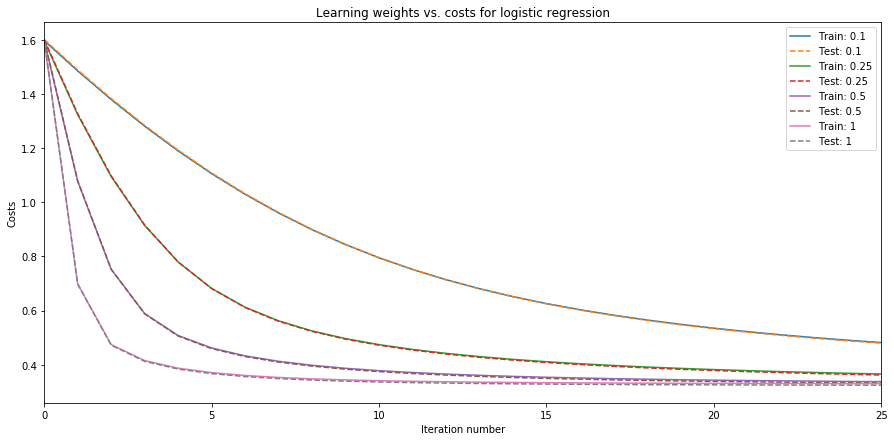

In [74]:
rates = [0.1, 0.25, 0.5,1]
stop_criteria = 1e-06

plt.figure(figsize = (15,7))
for eta in rates:
    w_train, train_costs = train_output.gradient_descent(eta, stop_criteria)
    w_test, test_costs = test_output.gradient_descent(eta, stop_criteria)
    plt.plot(train_costs, label = f'Train: {eta}')
    plt.plot(test_costs, label = f'Test: {eta}', linestyle = 'dashed')
    pass

plt.xlim(0,25)
plt.ylabel('Costs')
plt.xlabel('Iteration number')
plt.title('Learning weights vs. costs for logistic regression')
plt.legend()
plt.show()

Looking at the plot, the best learning rate is 1 as it converges the quickest for both train and test datasets. We also see that learning rates that are small have slower convergence and thus need more iterations or may miss the minimum if there are not enough iterations. Though not shown, if we put a learning rate of lets say 10, then it would not converge because the point would skip over the minimum and jump all around.

### l

In [75]:
kf = model_selection.StratifiedKFold(n_splits = 3, shuffle = True)
preds = np.empty(y_train.shape[0],dtype = 'object')

eta = 2
stop = 1e-6


for train_ind, val_ind in kf.split(x_train, y_train):
    
    x_train_cv, x_val_cv = x_train[train_ind], x_train[val_ind]
    y_train_cv, y_val_cv = y_train[train_ind], y_train[val_ind]   
    train_log_cv = logistic(x_train_cv, y_train_cv)
    val_log_cv = logistic(x_val_cv,y_val_cv)
    w_train = train_log_cv.gradient_descent(eta, stop)[0]
    preds[val_ind] = val_log_cv.probability(w_train)

The AUC for the cross-validation is 0.9329


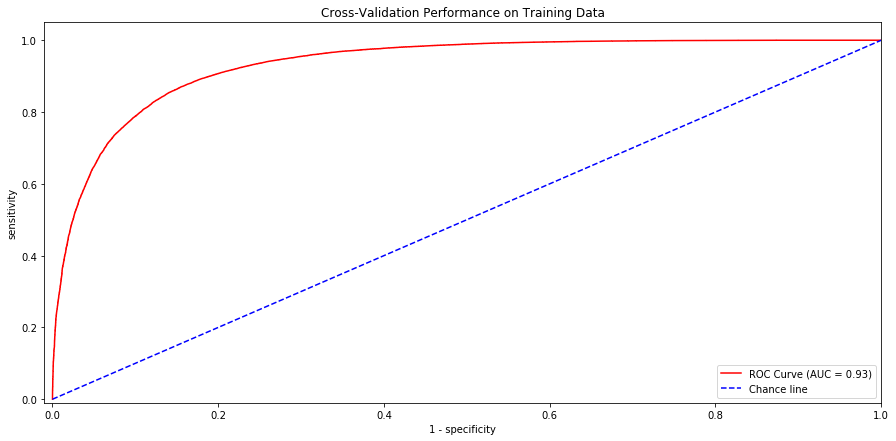

In [77]:

fpr,tpr,threshold = metrics.roc_curve(y_train, preds, pos_label = 1)
print(f'The AUC for the cross-validation is {round(metrics.auc(fpr,tpr),4)}')

plt.figure(figsize = (15,7))
plt.plot(fpr, tpr, color = 'red', label = f'ROC Curve (AUC = {round(metrics.auc(fpr,tpr),2)})')
plt.plot([0,1],[0,1],color = 'blue', linestyle = '--', label = 'Chance line')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.05)
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.title('Cross-Validation Performance on Training Data')
plt.legend(loc = 'lower right')
plt.show()

### m

By using k-fold, we are able to train the model on the training data and see how well it performs by building a model on k-1 folds and testing on the kth fold. This allows us to see the model performance before we apply it to the testing dataset. In addition, we can use k-fold to find optimal hyperparamters or in this case, an optimal learning rate by trying different combinations.

### n

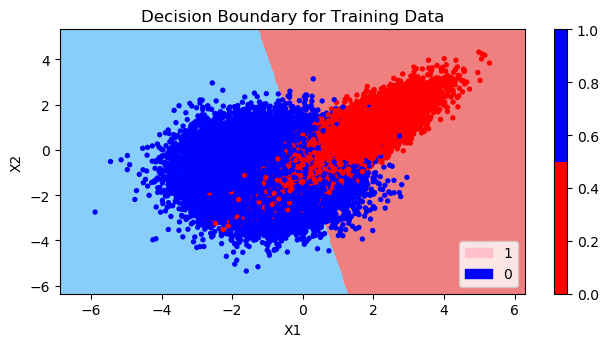

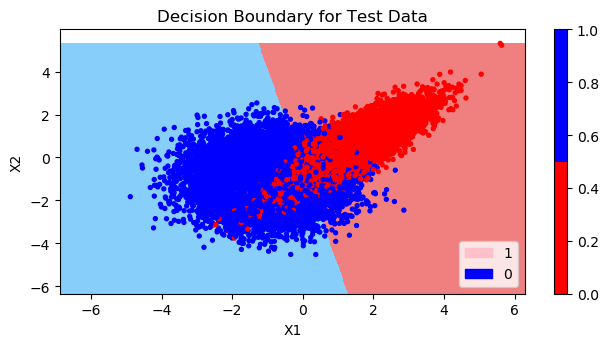

In [80]:
nvalues = 500
x1_vals = np.linspace(x_train[:,0].min() - 1, x_train[:,0].max() + 1, nvalues)
x2_vals = np.linspace(x_train[:,1].min() - 1, x_train[:,1].max() + 1, nvalues)
xx1, xx2 = np.meshgrid(x1_vals, x2_vals)
xvals = np.concatenate((np.c_[xx1.ravel()],np.c_[xx2.ravel()]),axis = 1)

train_log = logistic(x_train,y_train)
w_train = train_log.gradient_descent(eta, stop)[0]


bound_log = logistic(xvals, None) 

bound_prob = bound_log.probability(w_train).reshape(xx1.shape)

cmap_back = ListedColormap(['lightcoral','lightskyblue'])
cmap_front = ListedColormap(['red','blue'])

blue = mpatches.Patch(color='pink', label= '1')
red = mpatches.Patch(color='blue', label= '0')


plt.figure(figsize = (7.5,3.5), dpi = 100)
plt.pcolormesh(xx1,xx2,bound_prob,cmap = cmap_back)
plt.scatter(x_train[:,0],x_train[:,1], c = y_train, cmap = cmap_front, s = 8)
plt.legend(handles = [blue, red], loc = 'lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for Training')
plt.colorbar()
plt.show()

# Plot test data
plt.figure(figsize = (7.5,3.5), dpi = 100)
plt.pcolormesh(xx1,xx2,bound_prob,cmap = cmap_back)
plt.scatter(x_test[:,0],x_test[:,1], c = y_test, cmap = cmap_front, s = 8)
plt.legend(handles = [blue, red], loc = 'lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary for Test')
plt.colorbar()
plt.show()

# assisted by varun

### o

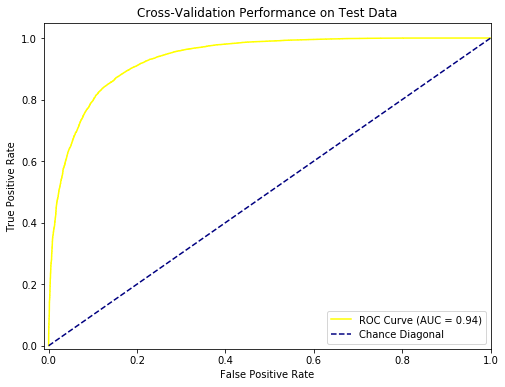

In [87]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, color = 'yellow', label = f'ROC Curve (AUC = {round(metrics.auc(fpr,tpr),2)})')
plt.plot([0,1],[0,1],color = 'navy', linestyle = '--', label = 'Chance Diagonal')
plt.xlim(-0.01,1)
plt.ylim(-0.01,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validation Performance on Test Data')
plt.legend(loc = 'lower right')
plt.show()

It seems that the best AUC is roughly 0.94, which is far better than chance

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class (i.e. class $y=0$, which are not 3's and class $y=1$ which are 3's), from the training dataset.

**(c)** How many examples are present in each class? Show a histogram of samples by class. Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

### a

In [1]:
#a)
from mnist import MNIST
import matplotlib.pyplot as plt
import numpy as np

mndata = MNIST('C:\\Users\\abhis\\Documents\\Duke University\\IDS 705 Machine Learning\\samples')

images_train, labels_train = mndata.load_training()
# or
images_test, labels_test = mndata.load_testing()


images_train = np.array(images_train)
labels_train = np.array(labels_train)
images_test = np.array(images_test)
labels_test = np.array(labels_test)

images_train = images_train.reshape(60000,28,28)
images_test = images_test.reshape(10000,28,28)

labels_train = np.where(labels_train == 3, 1, 0)
labels_test = np.where(labels_test == 3, 1, 0)


### b

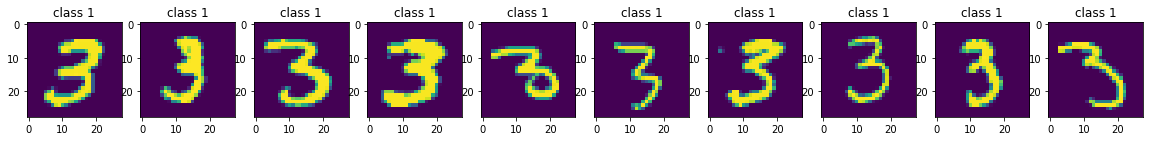

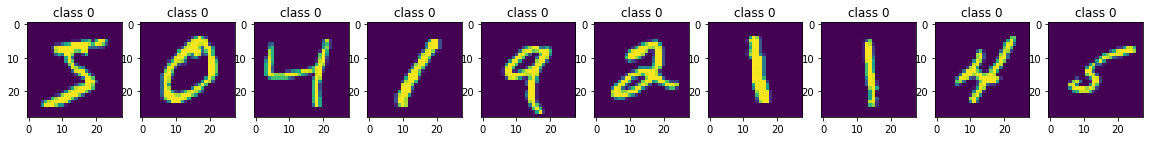

In [2]:
train_image_1 = images_train[labels_train == 1][0:10]
train_image_0 = images_train[labels_train == 0][0:10]

fig1, axes1 = plt.subplots(1,10, figsize=(20,10))
fig2, axes2 = plt.subplots(1,10, figsize=(20,10))

for i in range(10):
    axes1[i].set_title('class {}'.format(1))
    axes1[i].imshow(train_image_1[i])

for i in range(10):
    axes2[i].set_title('class {}'.format(0))
    axes2[i].imshow(train_image_0[i])
plt.show()

### c

[53869  6131]


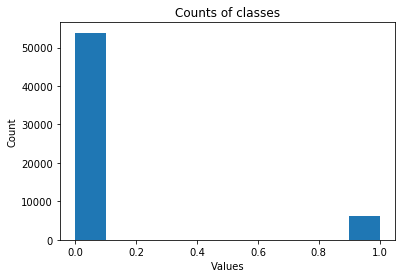

In [3]:
plt.hist(labels_train)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Counts of classes')
print(np.bincount(labels_train))

Looking at the chart, we have 53869 0's and 6131 1's and is obvious that the classes are imbalanced, this could make the classifier predict everything as 0 since there are few instances of 1's in the dataset.

### d

In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection

images_train = images_train.reshape(len(images_train),784,)
images_test = images_test.reshape(len(images_test),784,)

In [97]:
kf = model_selection.StratifiedKFold(n_splits = 3, shuffle = True)
preds = np.empty(labels_train.shape[0],dtype = 'object')

for train_ind, val_ind in kf.split(x_train, labels_train):
    x_train_cv, x_val_cv = images_train[train_ind], images_train[val_ind]
    y_train_3_cv, y_val_3_cv = labels_train[train_ind], labels_train[val_ind]
    
    log_train = LogisticRegression(tol = 5e-4)
    log_train.fit(x_train_cv,y_train_3_cv)
    
    preds[val_ind] = log_train.predict_proba(x_val_cv)[:,1]
    
# assisted by varun and ishan

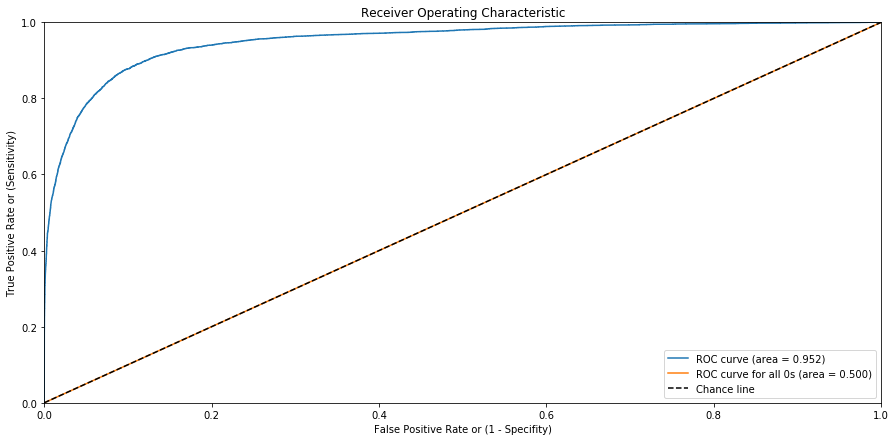

In [362]:
pred_all_0 = np.zeros((60000,), dtype=float)

plt.figure(figsize = (15,7))
np_labels_train = np.array(labels_train)
fpr, tpr, thresholds = roc_curve(np_labels_train, preds)
fpr2, tpr2, thresholds2 = roc_curve(np_labels_train, pred_all_0)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC curve for all 0s (area = %0.3f)' % roc_auc2)
plt.plot([0, 1], [0, 1], 'k--', label = 'Chance line')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

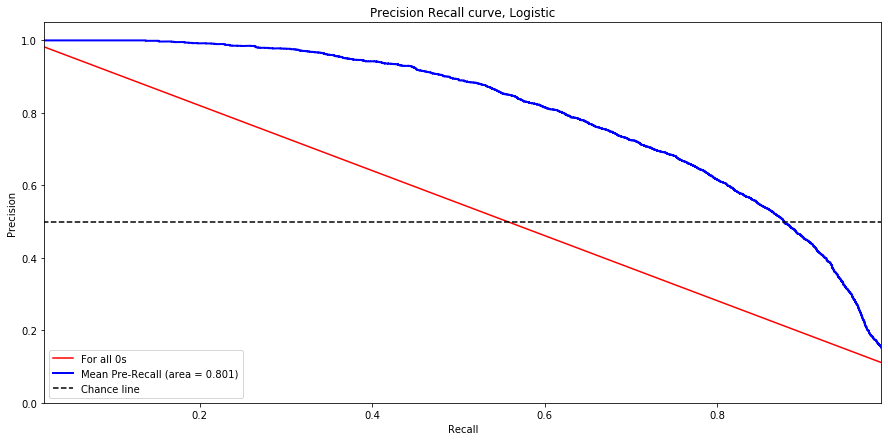

In [110]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

rand_nums = (np.random.uniform(size = 60000) < 0.5).astype(int)
rand_pos = len(rand_nums[rand_nums == 1])/len(rand_nums)

plt.figure(figsize = (15,7))
precision, recall, _ = precision_recall_curve(np_labels_train, preds)
pre_0, rec_0, thres_0 = precision_recall_curve(labels_train, pred_all_0)
plt.plot(rec_0,pre_0,color = 'red',  label = f'For all 0s')


lab = 'Mean Pre-Recall (area = %0.3f)' % (auc(recall, precision))
lab2 = 'Mean Pre-Recall (area = %0.3f)' % (auc(pre_0, rec_0))
plt.plot(recall, precision, label=lab, lw=2, color='blue') 
plt.plot([0,1],[rand_pos,rand_pos], color = 'black', linestyle = '--', label = f'Chance line')
plt.xlim([0.02, 0.99])
plt.ylim([0, 1.05])
plt.grid(False)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve, Logistic')
plt.rcParams['axes.facecolor']='white'
plt.legend(loc="lower left")
plt.show()

### f

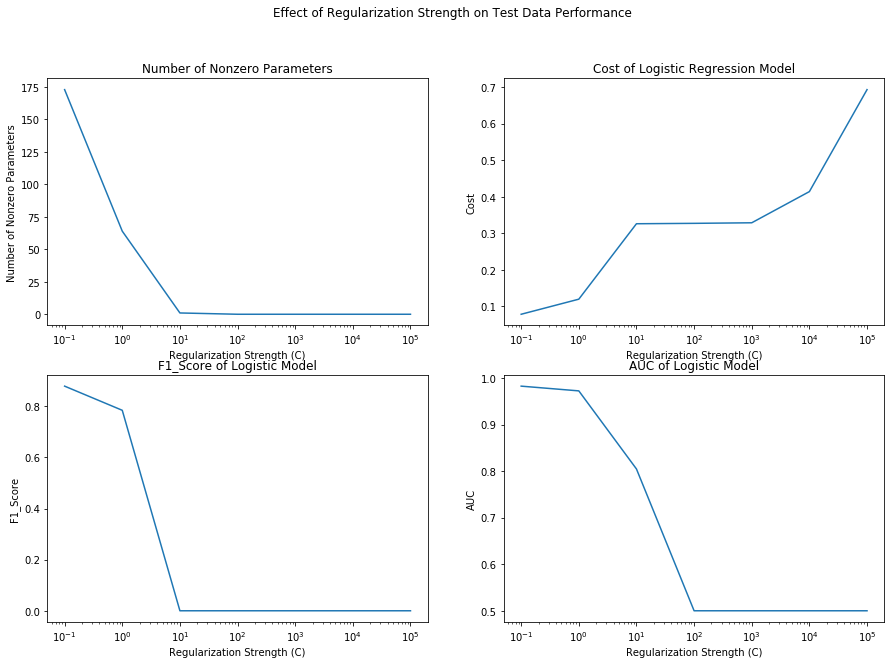

In [360]:
nonzero_params = []
costs = []
f1_scores = []
aucs = []

reg_params = np.logspace(-1, 5, 7)
reg_params

for i in reg_params:
    lasso = LogisticRegression(penalty = 'l1', C = i**-1, solver = 'liblinear')
    lasso_fit = lasso.fit(images_train, labels_train)
    
    test_preds = lasso_fit.predict(images_test)
    test_probs = lasso_fit.predict_proba(images_test)[:,1]
    
    nonzero_params.append(np.count_nonzero(lasso_fit.coef_))
    
    w = np.append(lasso_fit.intercept_, lasso_fit.coef_)
    costs.append(logistic(images_test, labels_test).cost(w))
    
    f1_scores.append(metrics.f1_score(labels_test, test_preds, pos_label = 1))
    
    aucs.append(metrics.roc_auc_score(labels_test, test_probs))
    pass


plt.figure(figsize = (15, 10))
plt.suptitle('Effect of Regularization Strength on Test Data Performance')


plt.subplot(2,2,1)
plt.plot(reg_params, nonzero_params)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Number of Nonzero Parameters')
plt.xscale("log")
plt.title('Number of Nonzero Parameters')


plt.subplot(2,2,2)
plt.plot(reg_params, costs)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Cost')
plt.xscale("log")
plt.title('Cost of Logistic Regression Model')


plt.subplot(2,2,3)
plt.plot(reg_params, f1_scores)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('F1_Score')
plt.xscale("log")
plt.title('F1_Score of Logistic Model')


plt.subplot(2,2,4)
plt.plot(reg_params, aucs)
plt.xlabel('Regularization Strength (C)')
plt.ylabel('AUC')
plt.xscale("log")
plt.title('AUC of Logistic Model')
plt.show()

# assisted by varun and ishaan

Looking at the 4 plots, we see that reglulaization decreases variance by shinking the slopes/coeff down to 0. As we increase lambda we punish the variables harder and drive them harder to 0. We see that the cost starts low and increases. In addtion, we see that once we hit a certain point of regularization, we start to lose performance on the test set due to underfitting. we see that based of the AUC that 100 is the best spot.

## 3

### [10 points] Comparing the Bayes' decision rule with logistic regression

The phrase "Bayes' decision rule" is often used to describe a classifier decision rule that minimizes misclassification rate (equally penalizing false positives and false negatives). In this exercise you will first determine the Bayes's decision rule for a binary classification problem where you know the likelihood of date from each class. The binary classification problem has two classes with data distributed as exponential random variables:

$$P(x|C_i) = \lambda_i e^{-\lambda_i x}$$

Where $C_i$ represents the class from which the sample is drawn (0 or 1). We also know that $\lambda_0 = 1$ and $\lambda_1 = 5$.

**(a)** Plot the probability of each class conditional distribution (e.g. likelihood function), $P(x|C_0)$ and $P(x|C_1)$ on the sample plot in the domain $x \in [0,2]$. *You can use [`scipy`'s `expon` module](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon) for this. Note that the `scale` parameter for this module is defined as $1/\lambda$.*

**(b)** Assuming the prior class distributions are $P(C_0)=P(C_1)=0.5$, determine the Bayes' decision rule using the information above including the posterior distributions and the prior distributions. You will assign the most probable class to the data based on the value of $x$. The decision rule will be of the form: 

If $x > x^*$, then predict Class 0, otherwise predict Class 1

Determine the value $x^*$ that minimizes misclassification (equally penalizing false positives and false negatives, and no penalty/reward for correct detections). Show your work in deriving this value.

**(c)** How does your answer in (b) relate to the the plot you made in (a)? Why?

**(d)** Load the test data in the file `A3_Q3_test.csv`. Apply your decision rule to the data. What is the misclassification rate (error rate, or fraction of misclassified samples) of this decision rule?

**(e)** Load the training data in the file `A3_Q3_train.csv` and train a logistic regression classifier on the data (using default parameters). What is your misclassification error for your test dataset? How does this compare with the Bayes' classifier?

**(f)** What is your decision rule for your logistic regression model? To compute this, extract the parameters from your fit model (look for the `coef_` and `intercept_` attributes) and since the classes are balanced, the decision rule will be to classify a sample $x$ as Class 1 when your logistic regression sigmoid is greater than 0.5 (the halfway point from the two extremes of 0 and 1). How does this compare with the Bayes' classifier?

**(g)** If the prior probabilities were not $P(C_0)=P(C_1)=0.5$, but instead if P(C_1)>P(C_0). How would this impact the optimal decision rule? Would it change, if so, would $x^*$ be larger or smaller?

In [9]:
from scipy.stats import expon
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### a

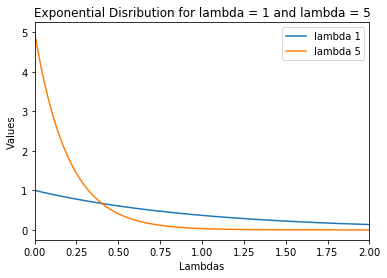

In [13]:
lambda_1 = 1
lambda_5 = 5
x = np.linspace(0,2,1000)

data_expon_1 = expon.pdf(x, scale=1/lambda_1)
data_expon_5 = expon.pdf(x, scale=1/lambda_5)

plt.plot(x, data_expon_1, label = 'lambda 1')
plt.plot(x, data_expon_5, label = 'lambda 5')

plt.figure(figsize = (15,7))
plt.title("Exponential Disribution for lambda = 1 and lambda = 5")
plt.xlim(0,2)
plt.xlabel('Lambdas')
plt.ylabel('Values')
plt.legend()
plt.show()

### b

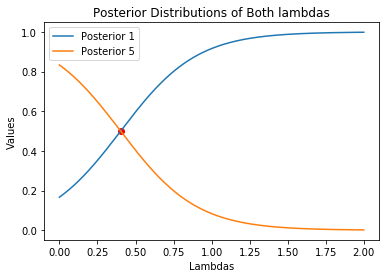

In [15]:
evidence = data_expon_1 * 0.5 + data_expon_5 * 0.5

posterior_1 = data_expon_1 * 0.5/evidence
posterior_5 = data_expon_5 * 0.5/evidence

plt.plot(x,posterior_1, label = 'Posterior 1')
plt.plot(x,posterior_5, label = 'Posterior 5')

plt.figure(figsize = (15,7))
plt.title("Posterior Distributions of Both lambdas")
plt.scatter(x = 0.402, y = 0.5, c = 'red')
plt.xlabel('Lambdas')
plt.ylabel('Values')
plt.legend()
plt.show()

In [114]:
(1/8) * np.log(25)

0.40235947810852507

### c

Using bayes rule, the value of the intersection point was caclulated to be 0.402. This itersection point shows where the posterior probability for both classes is equal to 50%. Before the intersection, all values up to the point would be classified as posterior 5, while all points after the intersection will be classified as posteior 1.

### d

In [118]:
df = pd.read_csv('C:\\Users\\abhis\\Documents\\Duke University\\IDS 705 Machine Learning\\A3_Q3_test.csv')

pred = []
for i in df['x']:
    if i > .402:
        pred.append(0)
    else:
        pred.append(1)
    pass

error = 0
for i in range(0,len(pred)):
    if pred[i] != df['y'][i]:
        error += 1
    pass

error/len(pred)

0.234

The error rate for this is 23.4%

### e

In [149]:
df = pd.read_csv('C:\\Users\\abhis\\Documents\\Duke University\\IDS 705 Machine Learning\\A3_Q3_train.csv')

X = np.array(df['x']).reshape(-1,1)
y = np.array(df['y'])

log_train = LogisticRegression()
log_model = log_train.fit(X,y)
pred = log_model.predict(X)

error = 1 - metrics.accuracy_score(y,pred)
round(error,4)

# assisted by philpe

0.2335

Looking at both models we see that they are both extremely close in terms of classificaition rate. The bayes classifier is marginally better, which makes sense because the bayes classifier is the optimal classifier.


### f

$$\\sigma(w^{T}x) > 0.5$$<br>$$\\sigma(-3.9194x + 1.5908)  > 0.5$$<br>$$ \\frac{1}{1 + e^{-3.9194x - 1.5908)}} >  0.5$$<br>$$ 1 >  e^{(-3.9194x - 1.5908)} $$<br>$$ 0 >  -3.9194x - 1.5908 $$<br>$$ 0.402... > x$$

After doing the math we get nearly the same value as we did in the bayes model, it is almost as good as bayes, but not there.

### g



if the prior for class 1 was greater then the posterior values would increase for class 1, which would shift the intersection point further right of the x axis.

## 4

### [30 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. You're encouraged to be creative.

**(b)** Download the data and plot the data to describe it. You can use any dataset of interest to you with the exception of the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset. Possible sources of dataset include (but are not limited to):

- [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Amazon Open Datasets](https://registry.opendata.aws/)
- [Microsoft's Open Data](https://msropendata.com/)
- [Google's Dataset Search](https://datasetsearch.research.google.com/)
- [Awesomedata's list of datasets](https://github.com/awesomedata/awesome-public-datasets)

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, where it did not, and how you could improve it. Summarize the conclusions from your work (this should involve a degree of interpretation more so than "my classifier achieved an AUC of 0.8").

*This grade for this question is based on (a) the completeness of the answer in addressing each of the above components, (b) the quality of the work and accuracy of the interpretation of the results of the analysis, (c) the presentation and professionalism of the work, and (d) the amount of creativity demonstrated by the work.*

a) The question i want to answer is can we predict salaries in san francisco 
b) the data is sourced from kaggle
c) my target variable is total pay, some interesting is jobtitle, base pay, overtime pay, and year.
d) for this problem a linear regression can be used. It is a parametric model that can allow us to see the Beta Coefficients as well as being a simple model. You want to always start simple
e) To evalulate performance adj. R squared and MSE will be used in combination to measure model performance 

### a

The question that I want to answer is what factors cause suicide rates as well as predicit the total number of suicides will happen.

### b

This dataset comes from kaggle.com 

### c

The target variable would be total_suicides. Some of the predictors are year, gender, age, suicide_no, population, gdp_per_year, gdp_per_capita, and generation. Aside from the variables, the data is properly cleaned from kaggle and no normalization or transformation is needed to be done to this dataset.

### d


The machine learning technique that will be used is a linear regresssion, since we want to understand the relationship between Y and the predictors, a parametric model like linear regression would be able to give us coefficients to quantifiy the relationship. Another reason is that in machine learning, it is best to start simple and go more complex if needed.

### e

For model performance, a combination of adjusted R squared and MSE will be used. The reason why we want adjusted R squared is because we will be using more than 1 X in this analysis and we must adjust the R squared value everytime we put in an additional X predictor. We also want to use MAE to see by how far our error varries from the true value. The idea is that if we have a high adjusted R squared, we would have a lower MAE.

### f

For this question, we would want to do a train/test split where we do a k-fold on the training portion and then test. The reasoning behind this is because we want to build a model on 80% of the data and before we apply the model to the test set, it would be wise to "test" the trained model. Then to make sure the model generalizes well, we then apply it to the test set as this data was not used at all in the k-fold/model building process; and see if we get a reasonable accuracy based of the training scores.

In [327]:
import seaborn as sns
df = pd.read_csv('C:/Users/abhis/Documents/Duke University/IDS 705 Machine Learning/master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [328]:
# keeping analysis in the USA
df = df.loc[df['country'] == 'United States',]


In [329]:
df['total_deaths'] = df.groupby('year')['suicides_no'].transform('sum')

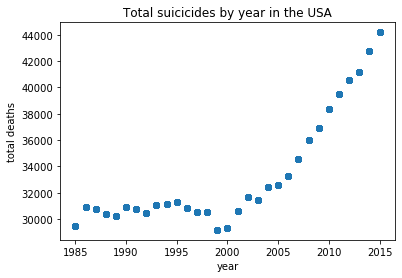

In [330]:
plt.scatter(x = 'year', y = 'total_deaths', data = df)
plt.xlabel('year')
plt.ylabel('total deaths')
plt.title("Total suicicides by year in the USA")
plt.show()


Looking at the graph, we can see that over time, the number of suicides has gone up, especially after 2000 where it seems that it is almost a linear skyshot. It is hard to understand why there is such a large spike after 2000, some have attributed it to "bad economy", but GDP overall increasese even if we consider the financial crises of 2008. Many believe that the US did not view mental health seriously as we do now, which is a better explanation of this rise.

Text(0, 0.5, 'Count')

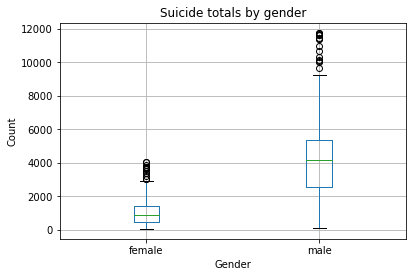

In [331]:
df.boxplot(by = 'sex', column = ['suicides_no'])
plt.suptitle("")
plt.title('Suicide totals by gender')
plt.xlabel('Gender')
plt.ylabel('Count')

Looking at the blox plot we see that men are more likly to commit suicide than women; the median value for mens deaths is just above 4000 comapred to the rougly 1000 for women. ALso we see that there are more outliers for men commiting suicide. Psychologists believe that the higher rate for suicide for men is that there are not many support systems for men when they are troubled compared to women.

Text(0, 0.5, 'Count')

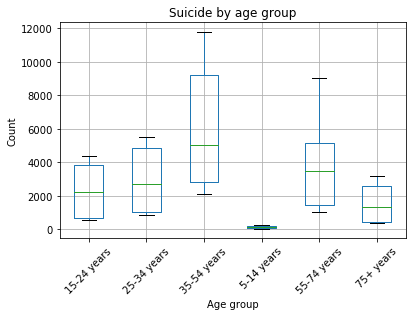

In [332]:
df.boxplot(by = 'age', column = ['suicides_no'], rot=45)
plt.suptitle("")
plt.title('Suicide by age group')
plt.xlabel('Age group')
plt.ylabel('Count')

Looking at this graph we see that the group with the heighest suicide rate is the age group 35-45 years old, followed by the 55-74 year olds. One could assume that the 35-45 year olds experience higher suicide rates is because of the "midlife-crisis" which falls in that age range

Text(0, 0.5, 'Count')

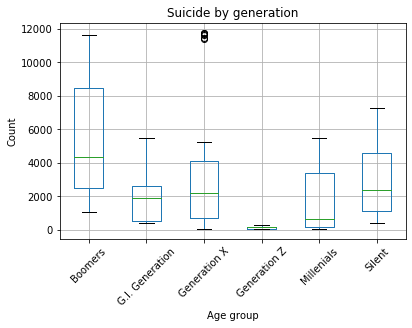

In [333]:
df.boxplot(by = 'generation', column = ['suicides_no'], rot=45)
plt.suptitle("")
plt.title('Suicide by generation')
plt.xlabel('Age group')
plt.ylabel('Count')

This graph is intersting, Boomers are the generation with the highest amounts of suicides, but if we look at the GI, X, and millenial generations, we see that the 4th quartile is nearly the same. Generation Z would have low suicide rates because most people in that group are quite young. Lastly, we see that Generation X has some outliers, one could assume these outliers come from around 2008 when the economic crises was happening as that would be a logical explanation for the outliers.

Text(0.5, 1.0, 'Suicides vs. GDP per capita')

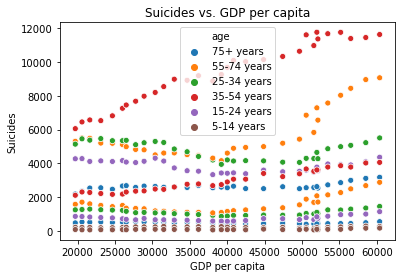

In [334]:
sns.scatterplot(x = 'gdp_per_capita', y = 'suicides_no', hue = 'age', data = df)
plt.xlabel('GDP per capita')
plt.ylabel('Suicides')
plt.title('Suicides vs. GDP per capita')

When we look at this graph, we see that there are some groups that have a pattern, to investigate this more we added another dimension of color and found that these patterns are caused by the age group. What we can infer about this graph is that GDP per capita may not have an effect in suicide rates, but rather its time, as GDP per capita is a proxy for year. Since GDP rises per year, this model is capturing the same relationship as year vs. suicides.

In [285]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [335]:
lm = smf.ols(formula=' suicides_no ~ year + sex + age + population + gdp_per_capita + generation', data=df)

In [287]:
res = lm.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           total_deaths   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     62.52
Date:                Wed, 19 Feb 2020   Prob (F-statistic):           6.00e-87
Time:                        04:30:45   Log-Likelihood:                -3404.1
No. Observations:                 372   AIC:                             6838.
Df Residuals:                     357   BIC:                             6897.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

Looking at the summary results of the table, we see that we have an adjusted R squared score of 0.699 percent which means the model explains the variance quite well. However, when we look more in detail wee see that many of the beta coefficients in the model are not significant. The only factors that are significant are the Intercept, Gen Z, and the year. We also see that we have strong multicollinearity, this is probably due becaue gdp and year are highly correlated as previously mentioned as well as age and generation. For now we will leave year and gdp and age and generation for the ML portion and see how it does in predition.

In [ ]:
df = df[['year', 'sex', 'age', 'population','gdp_per_capita','generation' ,'suicides_no']]

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

df = df.drop('country', axis = 1, errors = 'ignore')
df = df.drop('total_deaths', axis = 1, errors = 'ignore')

X = df[['year', 'sex', 'age', 'population','gdp_per_capita','generation']]
y = df[['suicides_no']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = pd.get_dummies(X_train, columns = ['sex', 'generation', 'age'])
X_test = pd.get_dummies(X_test, columns = ['sex', 'generation', 'age'])


In [357]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
regressor = LinearRegression()
model = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [352]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(model, X_train, y_train, cv=cv).mean()

0.8254219205200325

Looking at the average 5 folds that we trained on we see that the average accuracy is roughly 83% which is quite good

In [355]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred))  

Mean Absolute Error: 814.3800296409997


Looking at the MAE, it is not too bad, considering how many commit suicide a year, we are off by not a crazy amount

In [359]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 830.0500811894628


Now when we look at the test set, we see that the MAE has only gone up by a small amount, indicating that the cross validation was accurate and there was no extreme overfitting.